# MAP Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Se define la señal x[n] y los parámetros del prior

In [2]:
N = 10
A = 1
sigma = 1
wn = sigma*np.random.randn(N)
xn = A + wn
A_o = 2

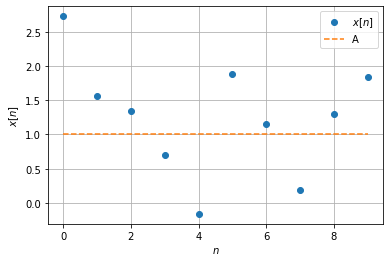

In [3]:
plt.plot(xn,'o')
plt.plot([0,N-1],[A,A],'--')
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.legend(['$x[n]$','A']);

#### Se halla: $p(A|x)=\frac{p(x|A)p(A)}{\int p(x|A)p(A)dA}$

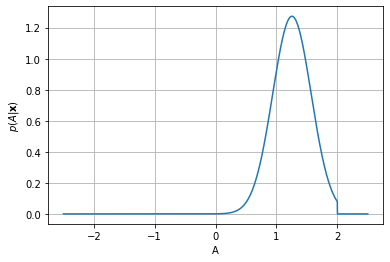

In [4]:
NA = 10001
Am = np.linspace(-2.5,2.5,num=NA)
dA = (Am[NA-1]-Am[0])/(NA-1)
pxA = np.zeros(NA)
for m in range(NA):
    pxA[m] = np.exp(-np.sum((xn-Am[m])**2)/(2*sigma**2))
pA = 1*(np.abs(Am)<A_o) / (2*A_o)
pAx = pxA*pA / (np.sum(pxA*pA)*dA)

plt.figure()
plt.plot(Am,pAx)
plt.xlabel('A')
plt.ylabel('$p(A|\mathbf{x})$')
plt.grid('on')

Se estima A por medio de MAP: $\hat{A}_{MAP}=\text{arg}\text{max}_{A}p(A|x)$

In [5]:
A_map = Am[np.argmax(pAx)]
print(A_map)


1.254


#### Se puede observar el corte en el gráfico y cómo el estimador no permite valores mayores ni menores a los del conocimiento de de A. Además, se obtiene un valor de 1.254 para el valor que maximiza la probabilidad del estimador MAP. Adicionalmente, el conocimiento de la distribución de A ayudan levemente debido a que la varianza del ruido es 1 y la señal muy raramente llega a valores menores y mayores de 2.